In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from textblob import TextBlob

In [2]:
data=pd.read_csv(r"C:\Users\hp\Downloads\covi19.csv",usecols=['text'])
data.head()

,text
0,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel #CoronaVirus...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4999 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [4]:
data.rename(columns = {'text':'Tweets'}, inplace = True)

In [5]:
data.head()

,Tweets
0,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel #CoronaVirus...


# Finding Polarity of Tweets

In [6]:
def getPolarity(text):
    
  return TextBlob(text).sentiment.polarity

data['Polarity']=data['Tweets'].apply(getPolarity)
data.head()

,Tweets,Polarity
0,If I smelled the scent of hand sanitizers toda...,-0.25
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,0.50
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,0.00
3,@brookbanktv The one gift #COVID19 has give me...,0.00
4,25 July : Media Bulletin on Novel #CoronaVirus...,0.00


In [7]:
def analysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

data['Analysis']=data['Polarity'].apply(analysis)
data.head()

,Tweets,Polarity,Analysis
0,If I smelled the scent of hand sanitizers toda...,-0.25,Negative
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,0.50,Positive
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,0.00,Neutral
3,@brookbanktv The one gift #COVID19 has give me...,0.00,Neutral
4,25 July : Media Bulletin on Novel #CoronaVirus...,0.00,Neutral


In [8]:
data.to_csv('tweets_analysis_dataset.csv')

# Text Pre-processing

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
corpus=[]
for j in range(0,4999):
    tweets=re.sub(r'[^A-Za-z]',' ',data['Tweets'][j])
    tweets=tweets.lower()
    tweets=tweets.split()
    tweets=[lemmatizer.lemmatize(word) for word in tweets if not word in set(all_stopwords)]
    tweets=' '.join(tweets)
    corpus.append(tweets)

In [23]:
corpus[0:11]

['smelled scent hand sanitizers today someone past would think intoxicated http co qzvybrogb',
 'hey yankee yankeespr mlb made sense player pay respect http co qvw zgypu',
 'diane wdunlap realdonaldtrump trump never claimed covid hoax claim effort http co jkk vhwhb',
 'brookbanktv one gift covid give appreciation simple thing always around http co z poalfxcw',
 'july medium bulletin novel coronavirusupdates covid kansalrohit drsyedsehrish airnewsalerts ani http co mn eecsjhh',
 'coronavirus covid death continue rise almost bad ever politician business want http co hxmhooxx c',
 'covid change work general recruiting specifically via proactivetalent recruiting http co bjzxzgpmbk',
 'wear face covering shopping includes visit local community pharmacy http co osu q kdd',
 'praying good health recovery chouhanshivraj covid covidpositive',
 'pope god prophet sadhu sundar selvaraj watch http co x rtykvji hurricanehanna covid http co dzcgunwl',
 'k covid case still response cbseindia hrdminist

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()

# **Naive Bayes**

In [25]:
x=cv.fit_transform(corpus).toarray()
y=data.iloc[:,-1].values
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [27]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(X_train,y_train)

MultinomialNB()

In [28]:
pred1=model1.predict(X_test)

In [29]:
pred1

array(['Neutral', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [30]:
from sklearn.metrics import accuracy_score,classification_report
acc1=accuracy_score(y_test,pred1)
print('Accuracy is:',acc1)
print('Classification Report is:',classification_report(y_test,pred1))

Accuracy is: 0.6113333333333333
Classification Report is:               precision    recall  f1-score   support

    Negative       1.00      0.13      0.23       226
     Neutral       0.73      0.49      0.59       646
    Positive       0.55      0.90      0.68       628

    accuracy                           0.61      1500
   macro avg       0.76      0.51      0.50      1500
weighted avg       0.70      0.61      0.58      1500



# **SVM**

In [47]:
from sklearn.svm import SVC
model2=SVC(kernel='rbf')
model2.fit(X_train,y_train)

SVC()

In [48]:
pred2=model2.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,classification_report
acc2=accuracy_score(y_test,pred2)
print('Accuracy is:',acc2)
print('Classification report is:',classification_report(y_test,pred2))

Accuracy is: 0.6906666666666667
Classification report is:               precision    recall  f1-score   support

    Negative       0.97      0.15      0.26       226
     Neutral       0.63      0.90      0.74       646
    Positive       0.78      0.67      0.72       628

    accuracy                           0.69      1500
   macro avg       0.79      0.57      0.57      1500
weighted avg       0.74      0.69      0.66      1500



# **KNN**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range=range(1,5)
score={}
score_list=[]
for i in k_range:
    
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score[i]=accuracy_score(y_test,y_pred)
  score_list.append(score[i])

In [51]:
score_list

[0.5533333333333333,
 0.5193333333333333,
 0.5286666666666666,
 0.5493333333333333]

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=1)
model3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
pred3=model3.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,classification_report
acc3=accuracy_score(y_test,pred3)
print('Accuracy is:',acc3)
print('Classification Report is:',classification_report(y_test,pred3))

Accuracy is: 0.5533333333333333
Classification Report is:               precision    recall  f1-score   support

    Negative       0.43      0.42      0.43       226
     Neutral       0.57      0.57      0.57       646
    Positive       0.58      0.59      0.58       628

    accuracy                           0.55      1500
   macro avg       0.53      0.53      0.53      1500
weighted avg       0.55      0.55      0.55      1500



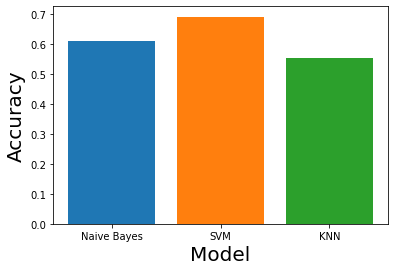

In [45]:
plt.bar('Naive Bayes',acc1)
plt.bar('SVM',acc2)
plt.bar('KNN',acc3)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Model',fontsize=20)
plt.show()

# **Visualization**

In [56]:
positive=[]
negative=[]
neutral=[]
for k in range(0,4999):
    if data['Analysis'][k]=='Positive':
        positive.append(corpus[k])
    elif data['Analysis'][k]=='Negative':
      negative.append(corpus[k]) 
    else:
        neutral.append(corpus[k])    

# Comparison Chart

Text(0.5, 0, 'Analysis')

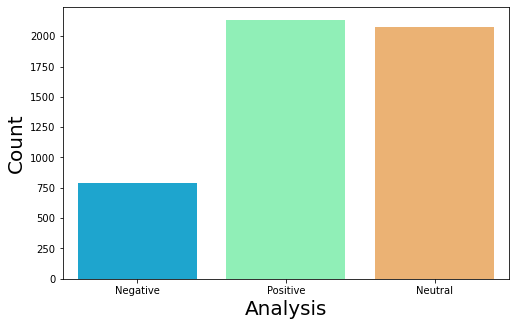

In [57]:
import seaborn as sns
plt.figure(figsize = (8,5), facecolor = None)
sns.countplot(x='Analysis',data=data,palette='rainbow')
plt.ylabel('Count',fontsize=20)
plt.xlabel('Analysis',fontsize=20)

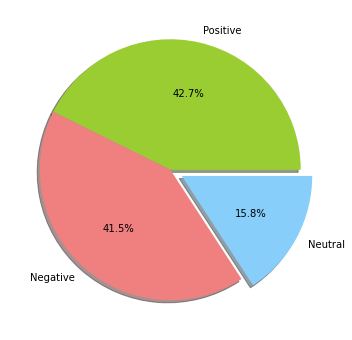

In [58]:
explode=(0,0,0.1)
labels=['Positive','Negative','Neutral']
colors=['yellowgreen','lightcoral','lightskyblue']
sizes=[49.94,34.40,15.66]
plt.figure(figsize = (8,6), facecolor = None)
plt.pie(data['Analysis'].value_counts(),explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.show()

# Further Visualizations...

In [63]:
!pip install wordcloud

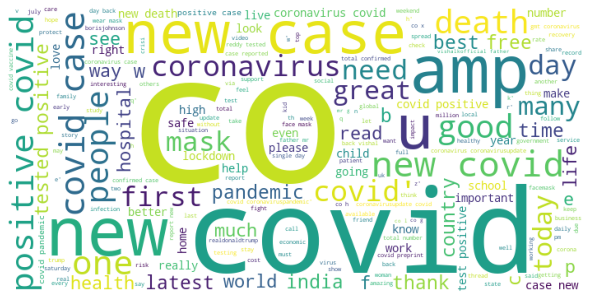

In [64]:
# WORDCLOUD of POSITIVE TWEETS
from wordcloud import WordCloud,STOPWORDS
stopwords=STOPWORDS
wc = WordCloud(width = 700, height = 350, background_color ='white', stopwords = stopwords) 
wc.generate(str(positive))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

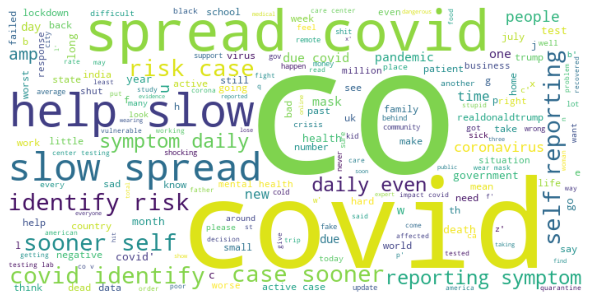

In [65]:
# Negative
from wordcloud import WordCloud,STOPWORDS
stopwords=STOPWORDS
wordcloud=WordCloud(width=700,height=350,background_color='white',stopwords=stopwords)
wordcloud.generate(str(negative))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

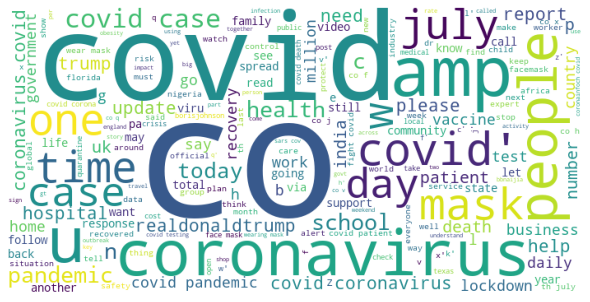

In [66]:
# Neutral
from wordcloud import WordCloud,STOPWORDS
stopwords=STOPWORDS
wordcloud=WordCloud(width=700,height=350,background_color='white',stopwords=stopwords)
wordcloud.generate(str(neutral))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()